In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy
import seaborn as sns
import ipywidgets

In [2]:
dt = pd.read_csv("sample_flat.csv")

In [3]:
dt.head()

,names,dates,latitude,longitude,categorical,quant1,quant2,quant3
0,b'Rawad',1.453009e+09,-19.988651,-41.435565,Category01,1.933239,6.052785,6105.123120
1,b'Eurma',1.471779e+09,-8.593256,27.742604,Category00,1.520733,-11.065076,143.902725
2,b'Taleia',1.473613e+09,-67.463164,-109.366796,Category04,1.863466,11.437340,2019.370225
3,b'Niley',1.481194e+09,-7.537010,-32.218540,Category03,0.745431,19.415543,3225.920647
4,b'Acey',1.454403e+09,-17.116866,2.949914,Category05,1.031100,17.714492,4976.099324


In [202]:
def mapplot (data=dt):
    fig, ax = plt.subplots(figsize = (20,20))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    #ax.stock_img()
    ax.scatter(dt["longitude"],dt["latitude"],c="#f7cac9")
    ax.set_title('Spatial Distribution', fontsize = 22)

    #ax.gridlines()

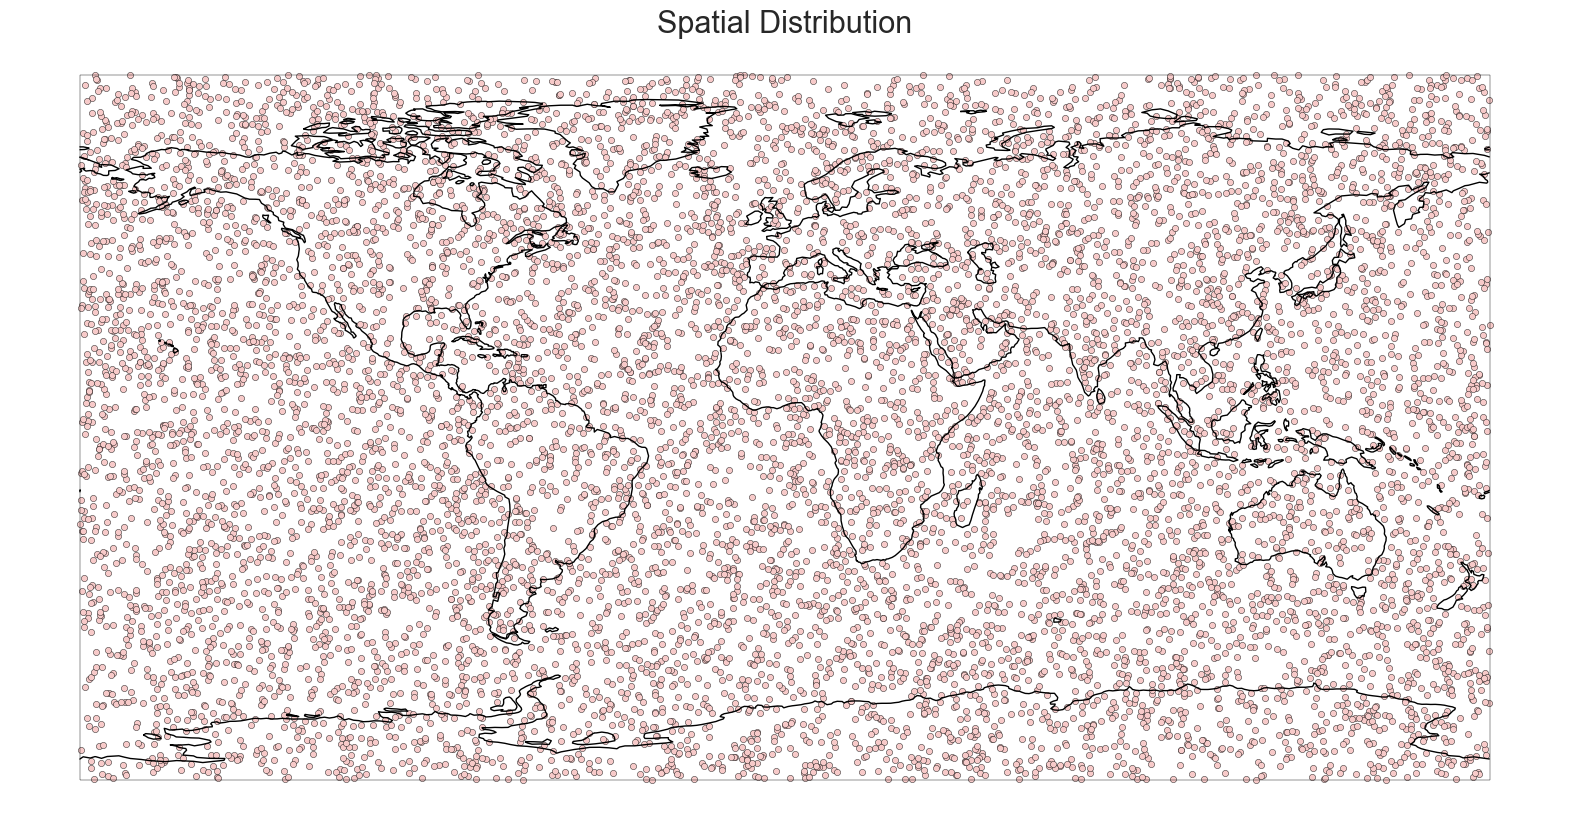

In [203]:
mapplot(dt)

In [235]:
def map_cat_interactive(catcolumn, value,quantsize,quantcolor):
    good = (dt[catcolumn] == value)
    data_filtered = dt[good]
    min_val, max_val = dt[quantsize].min(), dt[quantsize].max()
    dt["newquant"] = ((dt[quantsize]-min_val)/(max_val-min_val))*100
    
    fig, ax = plt.subplots(figsize = (20,20))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    artist=ax.scatter(data_filtered["longitude"],data_filtered["latitude"],c=(data_filtered[quantcolor]),s=(dt.newquant))
    ax.set_title('Category: {0}'.format(value), fontsize = 22)
    # Create the inset axes and use it for the colorbar.
    cax = fig.add_axes([0.9, 0.4, 0.05, 0.3])
    cbar = fig.colorbar(artist, cax=cax)
    

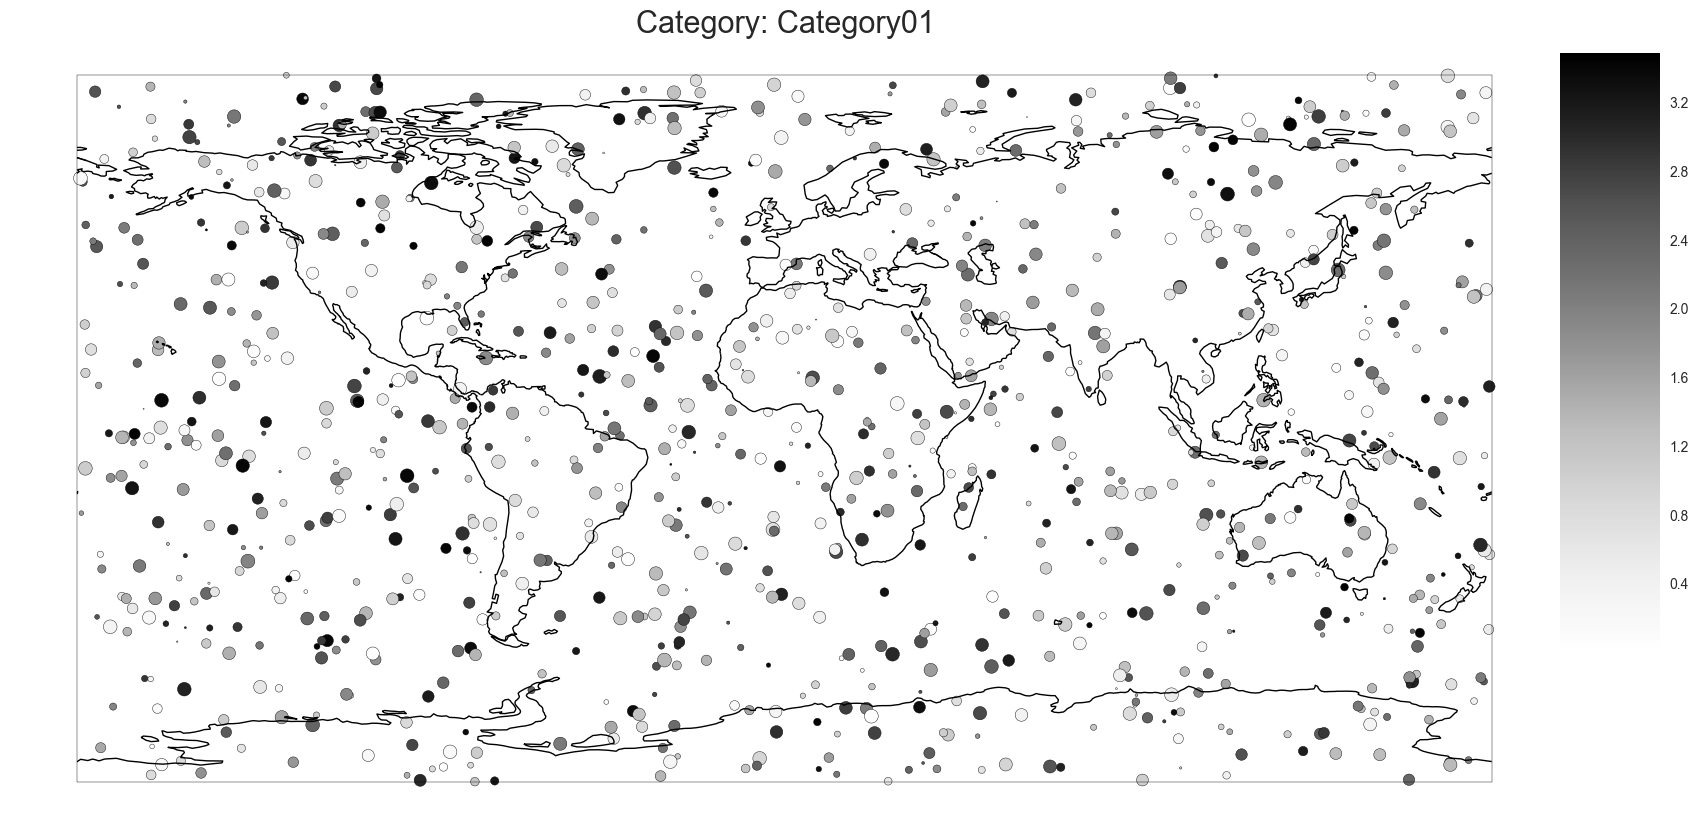

In [237]:
import ipywidgets
ipywidgets.interact(map_cat_interactive, catcolumn = 'categorical',
                   value = dt['categorical'].unique().tolist(),quantsize="quant2",quantcolor="quant1")

In [10]:
dt['categorical'].unique().tolist()

['Category01',
 'Category00',
 'Category04',
 'Category03',
 'Category05',
 'Category07',
 'Category09',
 'Category08',
 'Category02',
 'Category06']

In [11]:
def groupmap(data=dt,column="categorical"):
    groups=dt.groupby(column)
    fig, ax = plt.subplots(figsize = (20,20))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    for name, group in groups:
        ax.plot(group.longitude, group.latitude, marker='.', linestyle='', ms=12, label=name,alpha=0.3)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.025),
              fancybox=True, shadow=True, ncol=5)
    ax.set_title('Map by categorical data', fontsize = 22)
    plt.show()

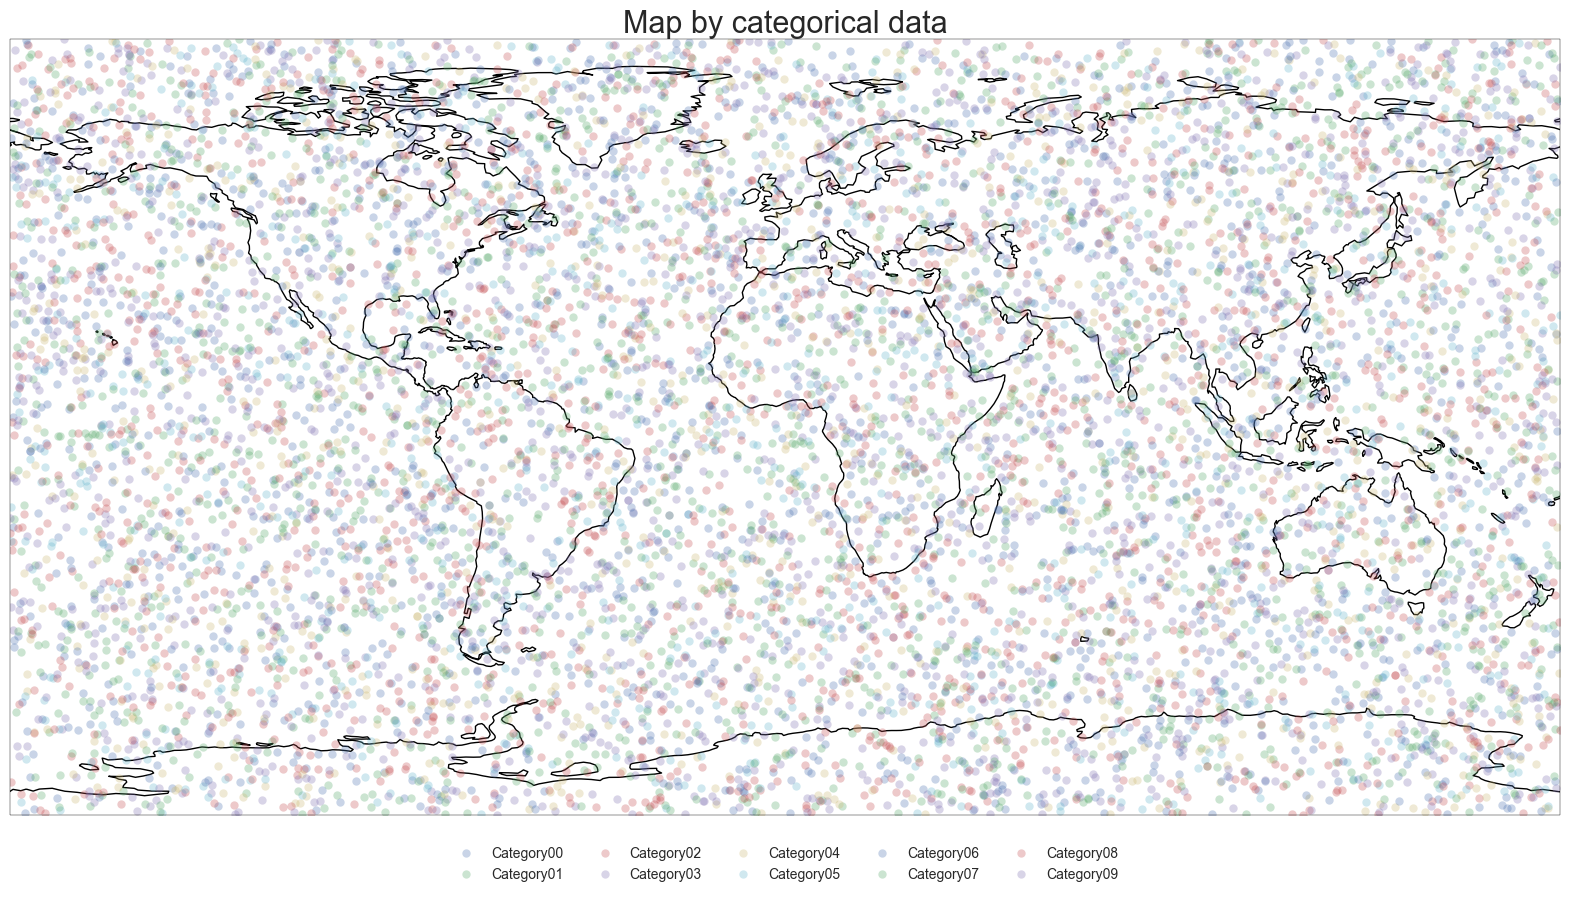

In [12]:
groupmap(dt,"categorical")

In [14]:
dt["dates"].max()

1483138417.23

In [15]:
dt["dates"].min()

1451611766.29

In [65]:
import datetime
def getYear(inp):
    temp = datetime.datetime.fromtimestamp(inp).strftime('%Y')
    return temp

In [66]:
getYear(1451611766.29)

'2015'

In [67]:
dt['Year'] = dt.dates.apply(getYear)

In [68]:
dt['Year'][:10]

0    2016
1    2016
2    2016
3    2016
4    2016
5    2016
6    2016
7    2016
8    2016
9    2016
Name: Year, dtype: object

In [78]:
yearmin=dt["Year"].min()
yearmin

'2015'

In [96]:
yearmin=dt["Year"].min()
yearmax=dt["Year"].max()
def mapbyyear(column="Year",value="2016"):
    good = (dt[column] == value)
    data_filtered = dt[good]
    fig, ax = plt.subplots(figsize = (20,20))
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    ax.plot(data_filtered["longitude"],data_filtered["latitude"], '.c')
    ax.set_title('Year: {0}'.format(value), fontsize = 22)


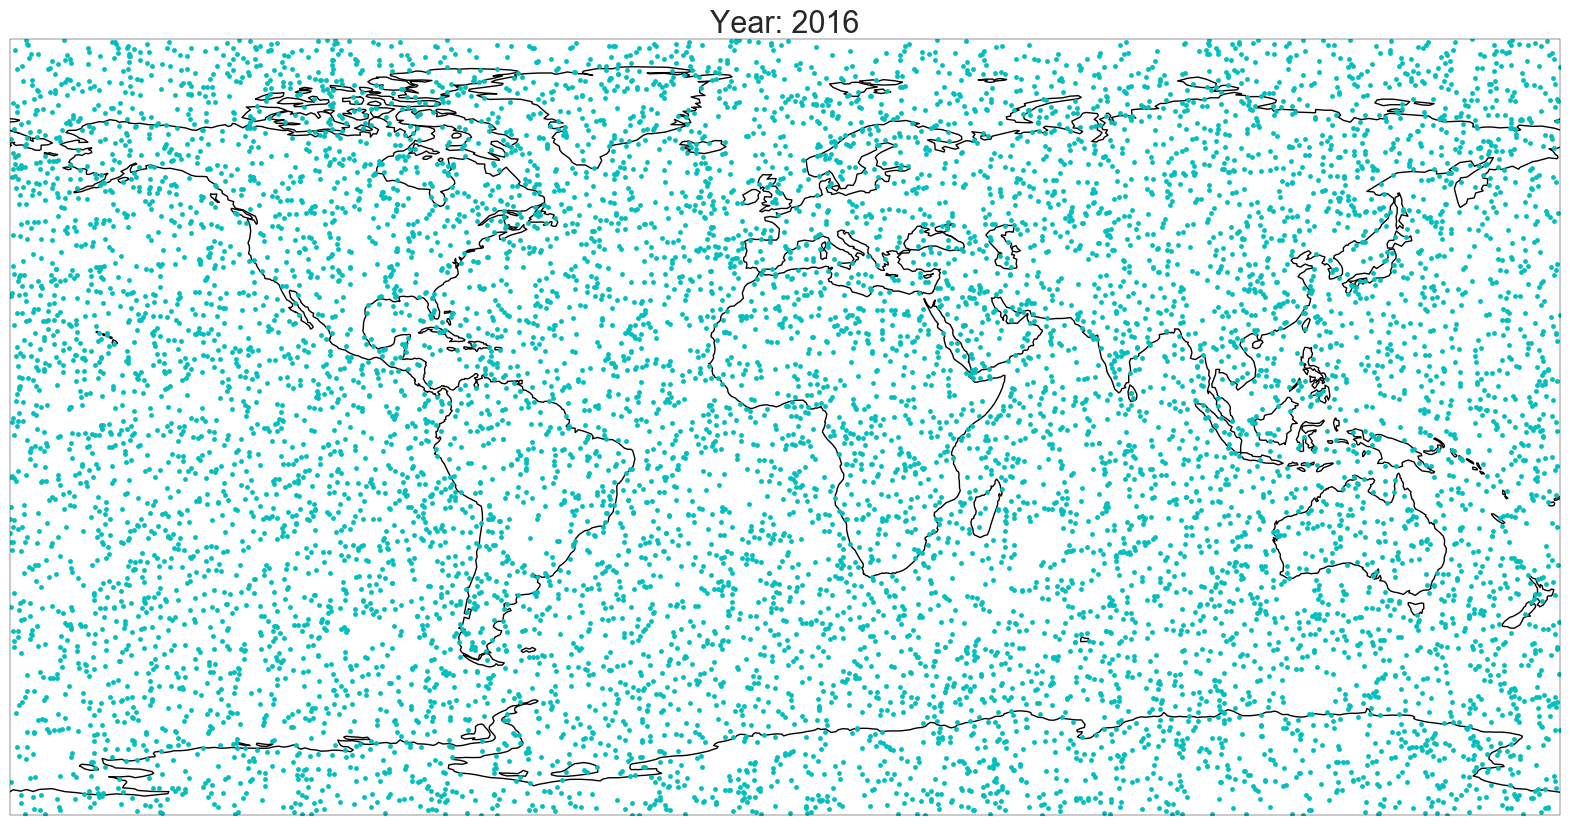

In [97]:
ipywidgets.interact(mapbyyear, column="Year",
                    value=(yearmin,yearmax))